In [1]:
import numpy as np
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import auc,roc_curve,roc_auc_score
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score,GridSearchCV
from statistics import mean
color = sns.color_palette()
sns.set_style("darkgrid")

# Data Preprocessing

In [2]:
# load data
test = pd.read_csv('testdata.txt', sep=';')
data = pd.read_csv('traininingdata.txt', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,no
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,no
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,no
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,no
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,yes


In [3]:
data['y'] = data['y'].map(lambda x: 1 if x == 'yes' else 0)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,divorced,secondary,no,-78,yes,yes,cellular,29,jul,10,23,-1,0,unknown,0
1,50,management,married,tertiary,no,106,yes,no,unknown,15,may,388,2,-1,0,unknown,0
2,47,admin.,married,secondary,no,407,yes,no,unknown,5,jun,67,12,-1,0,unknown,0
3,39,admin.,divorced,secondary,no,952,yes,no,unknown,16,jun,62,1,-1,0,unknown,0
4,30,management,single,tertiary,no,364,no,no,cellular,30,apr,306,2,-1,0,unknown,1


In [4]:
test['y'] = test['y'].map(lambda x: 1 if x == 'yes' else 0)
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,48,housemaid,married,tertiary,no,468,yes,no,unknown,14,may,220,1,-1,0,unknown,0
1,31,management,single,tertiary,no,10215,no,no,cellular,22,aug,139,2,-1,0,unknown,0
2,45,blue-collar,married,primary,no,900,yes,no,unknown,9,jun,213,1,-1,0,unknown,0
3,58,blue-collar,married,primary,no,1231,no,no,unknown,20,jun,21,3,-1,0,unknown,0
4,35,technician,single,tertiary,no,5301,no,no,cellular,21,nov,937,2,-1,0,unknown,1


### Encode non-numeric variables as numeric variables

In [5]:
encoder = ce.OrdinalEncoder(cols=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])
train = encoder.fit_transform(data)
test = encoder.transform(test)

In [6]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,1,1,1,1,-78,1,1,1,29,1,10,23,-1,0,1,0
1,50,2,2,2,1,106,1,2,2,15,2,388,2,-1,0,1,0
2,47,3,2,1,1,407,1,2,2,5,3,67,12,-1,0,1,0
3,39,3,1,1,1,952,1,2,2,16,3,62,1,-1,0,1,0
4,30,2,3,2,1,364,2,2,1,30,4,306,2,-1,0,1,1


In [7]:
train.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.942076,4.120383,2.168077,1.721522,1.017972,1365.055989,1.446168,1.840494,1.417994,15.778534,4.008073,258.363166,2.769907,39.749889,0.579601,1.354098,0.116982
std,10.616610,2.802835,0.607582,0.867651,0.132850,3098.191637,0.497101,0.366152,0.610023,8.313360,2.773949,257.188052,3.119367,99.547099,2.384831,0.801126,0.321403
min,18.000000,1.000000,1.000000,1.000000,1.000000,-8019.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000,0.000000
25%,33.000000,2.000000,2.000000,1.000000,1.000000,72.000000,1.000000,2.000000,1.000000,8.000000,2.000000,103.000000,1.000000,-1.000000,0.000000,1.000000,0.000000
50%,39.000000,4.000000,2.000000,1.000000,1.000000,448.000000,1.000000,2.000000,1.000000,16.000000,3.000000,180.000000,2.000000,-1.000000,0.000000,1.000000,0.000000
75%,48.000000,5.000000,3.000000,2.000000,1.000000,1422.250000,2.000000,2.000000,2.000000,21.000000,7.000000,320.000000,3.000000,-1.000000,0.000000,1.000000,0.000000
max,95.000000,12.000000,3.000000,4.000000,2.000000,102127.000000,2.000000,2.000000,3.000000,31.000000,12.000000,4918.000000,63.000000,871.000000,275.000000,4.000000,1.000000


# Model Training

From feature engineering we can see that all features are valuable for y, so we choose all features to train the model.

In [8]:
inputs = data.columns[:-1]
outputs = data.columns[-1]

In [9]:
X_train = train[inputs]
y_train = train[outputs]
X_test = test[inputs]
y_test = test[outputs]
# data normalization
column_name=X_train.columns
zscore = preprocessing.StandardScaler()
X_train = zscore.fit_transform(X_train)
X_train = pd.DataFrame(data=X_train,columns=column_name)
X_test = zscore.fit_transform(X_test)
X_test = pd.DataFrame(data=X_test,columns=column_name)

In [10]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,0.099649,-1.113310,-1.922527,-0.831592,-0.13528,-0.465780,-0.897553,-2.295511,-0.685219,1.590410,-1.084416,-0.965700,6.485410,-0.409359,-0.24304,-0.442006
1,0.853196,-0.756524,-0.276636,0.320961,-0.13528,-0.406390,-0.897553,0.435633,0.954085,-0.093650,-0.723914,0.504062,-0.246819,-0.409359,-0.24304,-0.442006
2,0.570616,-0.399737,-0.276636,-0.831592,-0.13528,-0.309235,-0.897553,0.435633,0.954085,-1.296549,-0.363412,-0.744070,2.959004,-0.409359,-0.24304,-0.442006
3,-0.182931,-0.399737,-1.922527,-0.831592,-0.13528,-0.133323,-0.897553,0.435633,0.954085,0.026640,-0.363412,-0.763511,-0.567401,-0.409359,-0.24304,-0.442006
4,-1.030671,-0.756524,1.369255,0.320961,-0.13528,-0.323114,1.114140,0.435633,-0.685219,1.710700,-0.002910,0.185224,-0.246819,-0.409359,-0.24304,-0.442006


Here we use Decision Tree, Random Forest, AdaBoost and Gradient Boosting Decision Tree to train the model.

First, we train them with default parameters.

In [11]:
methods = ['tree','Boosting','random forest','GBDT']

In [12]:
def machine_learning_default(method,x_train,y_train):
    if method == 'tree':
        clf = DecisionTreeClassifier()
        name = 'Decision Tree'
    elif method == 'Boosting':
        clf = AdaBoostClassifier()
        name = 'Adaboost'
    elif method == 'random forest':
        clf = RandomForestClassifier()
        name = 'RandomForest'
    elif method == 'GBDT':
        clf =GradientBoostingClassifier()
        name = 'GradientBoosting'
    else:
        print('Wrong Method!')
        return None
    clf.fit(x_train,y_train)
    return clf,name

In [13]:
clfs_default = []
names = []
for method in methods:
    res = machine_learning_default(method,X_train,y_train)
    clfs_default.append(res[0])
    names.append(res[1])

In [14]:
def auc_roc(clf,name):
    fpr,tpr,threshold = roc_curve(y_test,clf.predict_proba(X_test)[:,1])
    auc_value = auc(fpr,tpr)
    aucs.append(auc_value)
    plt.title('ROC for '+name)
    plt.plot(fpr,tpr,'b',label='AUC={}'.format(auc_value))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel('False Positive Rate')
    plt.xlabel('True Positive Rate')
    return

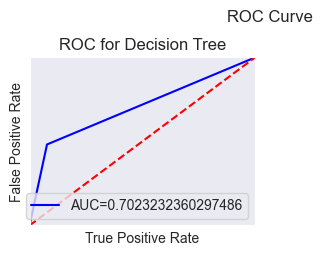

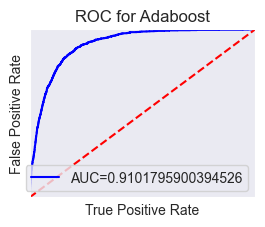

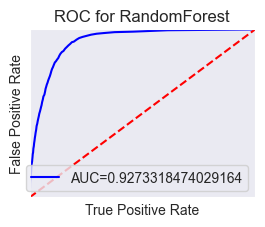

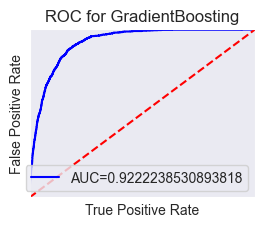

In [15]:
aucs=[]
plt.figure()
plt.suptitle('ROC Curve')
for i in range(len(methods)):
    plt.subplot(2,2,i+1)
    auc_roc(clfs_default[i],names[i])
    plt.show()

From the AUC value, Random Forest, Adaboost method and Gradient Boosting Decision Tree model have better predictive ability.

Now we combined with the Confusion Matrix:

In [16]:
from sklearn.metrics import confusion_matrix

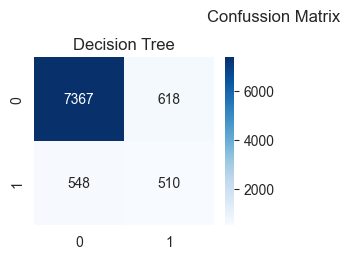

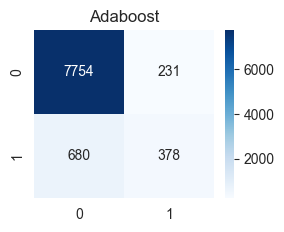

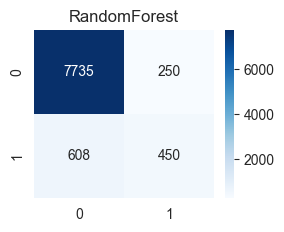

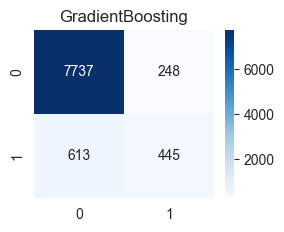

In [17]:
plt.figure()
plt.suptitle('Confussion Matrix')
for i in range(len(methods)):
    plt.subplot(2,2,i+1)
    cm=confusion_matrix(y_test,clfs_default[i].predict(X_test))
    ax=sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
    plt.title(names[i])
    plt.show()

From the confusion matrix, the AdaBoost method can best identify "no" examples, while the Random Forest method can best identify "yes" examples.

Now we combined with F1 score.

In [18]:
def model_evaluation(clf):
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred)
    precision = precision_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    return [accuracy,recall,precision,f1]

In [19]:
res_default=pd.DataFrame(columns=['accuracy','recall','precision','f1_score'],index=names)
for i in range(len(methods)):
    res_default.loc[names[i]]=model_evaluation(clfs_default[i])
res_default['auc']=np.array(aucs)
res_default

,accuracy,recall,precision,f1_score,auc
Decision Tree,0.87106,0.482042,0.452128,0.466606,0.702323
Adaboost,0.899259,0.357278,0.62069,0.453509,0.910180
RandomForest,0.90512,0.425331,0.642857,0.511945,0.927332
GradientBoosting,0.904788,0.420605,0.642136,0.508281,0.922224


In F1 score, the Random Forest method behaves better, the AdaBoost method has a low recall value due to its excessive tendency to predict "no", which affects the F1 score.

In [ ]:
# Model Selection

In [ ]:
The following is a model selection for some parameters of the model. The training method is to select the model within the set parameter range in the form of 5-fold cross-validation on the training set and the auc value as the standard.

In [22]:
clf_best=[]

In [ ]:
## Decision Tree

In [ ]:
For the Decision Tree method, the criteria (Gini index/information gain), maximum depth (3, 5, 8, 15) and minimum leaf nodes (1, 2, 5, 10) are selected separately

In [23]:
parameters = {'criterion':('gini','entropy'),'max_depth': [3,5,8,15],'min_samples_leaf':[1,2,5,10]}
clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,parameters,cv=5,scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [3, 5, 8, 15],
                         'min_samples_leaf': [1, 2, 5, 10]},
             scoring='roc_auc')

In [24]:
print(clf.best_estimator_)
clf_best.append(clf.best_estimator_)

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10)


In [ ]:
## AdaBoost

For the AdaBoost method, we choose the number of boosts and the learning rate (speed of gradient convergence).

In [25]:
parameters = {'n_estimators':[50, 80, 100, 200],'learning_rate':[0.2, 0.5, 0.8, 1]}
clf_boost = AdaBoostClassifier()
clf = GridSearchCV(clf_boost,parameters,cv=5,scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.5, 0.8, 1],
                         'n_estimators': [50, 80, 100, 200]},
             scoring='roc_auc')

In [26]:
print(clf.best_estimator_)
clf_best.append(clf.best_estimator_)

AdaBoostClassifier(learning_rate=0.5, n_estimators=200)


## Random Forest

For the Random Forest method, the number of trees and the parameters of each tree (same as the decision tree) are selected

In [27]:
parameters = {'n_estimators':[10,20,50,80,100],'criterion': ('gini','entropy'),'max_depth':[3,5,8,15],'min_samples_leaf':[1,2,5,10]}
clf_rf = RandomForestClassifier()
clf = GridSearchCV(clf_rf,parameters,cv=5,scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [3, 5, 8, 15],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'n_estimators': [10, 20, 50, 80, 100]},
             scoring='roc_auc')

In [28]:
print(clf.best_estimator_)
clf_best.append(clf.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                       n_estimators=80)


## Gradient Boosting Decision Tree

For the GBDT method, we choose the same parameters as AdaBoost.

In [29]:
parameters = {'n_estimators':[50, 80, 100, 200],'learning_rate':[0.2, 0.5, 0.8, 1]}
clf_boost = GradientBoostingClassifier()
clf = GridSearchCV(clf_boost,parameters,cv=5,scoring='roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.2, 0.5, 0.8, 1],
                         'n_estimators': [50, 80, 100, 200]},
             scoring='roc_auc')

In [30]:
print(clf.best_estimator_)
clf_best.append(clf.best_estimator_)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)


In [ ]:
## Result

In [31]:
clf_best

[DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=10),
 AdaBoostClassifier(learning_rate=0.5, n_estimators=200),
 RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_leaf=5,
                        n_estimators=80),
 GradientBoostingClassifier(learning_rate=0.2, n_estimators=200)]

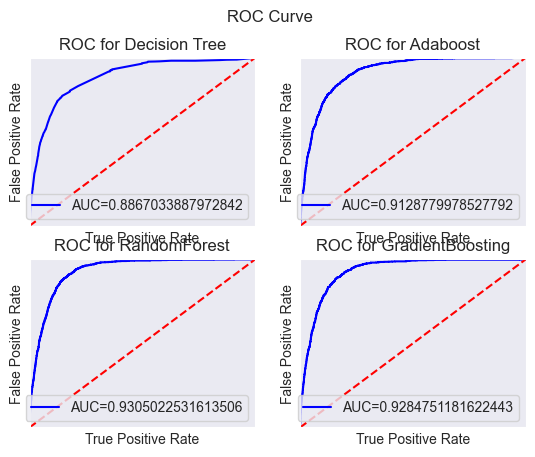

In [32]:
aucs=[]
plt.figure()
plt.suptitle('ROC Curve')
for i in range(len(methods)):
    plt.subplot(2,2,i+1)
    auc_roc(clf_best[i],names[i])
plt.show()

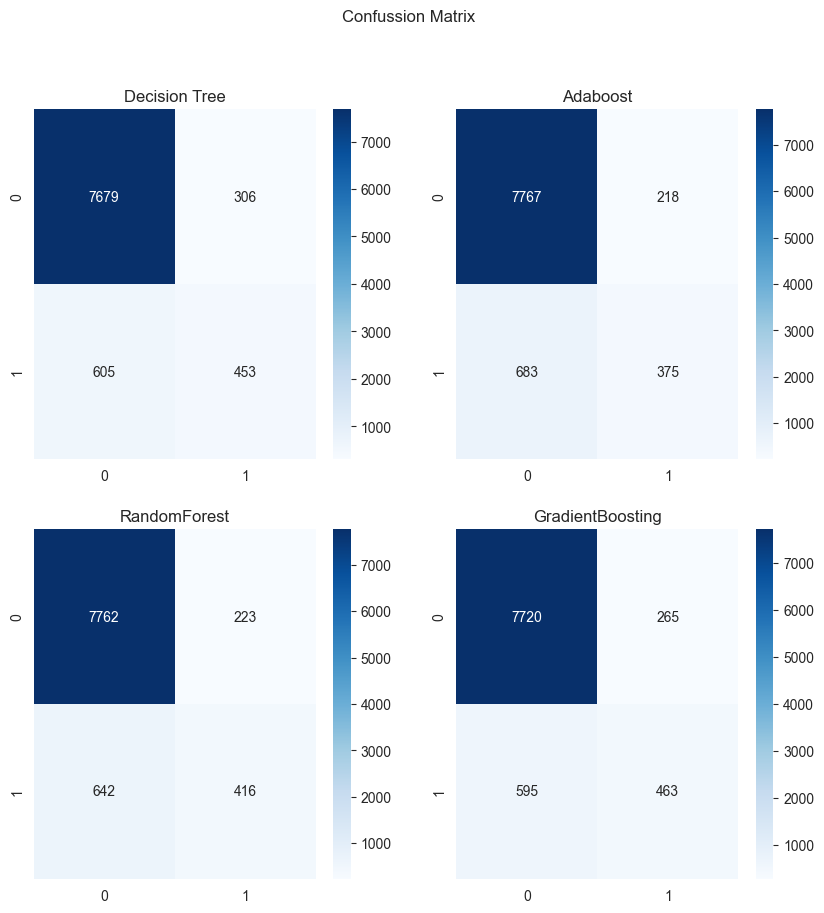

In [33]:
plt.figure(figsize=(10,10))
plt.suptitle('Confussion Matrix')
for i in range(len(methods)):
    plt.subplot(2,2,i+1)
    cm=confusion_matrix(y_test,clf_best[i].predict(X_test))
    ax=sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
    plt.title(names[i])
plt.show()

In [34]:
res=pd.DataFrame(columns=['accuracy','recall','precision','f1_score'],index=names)
for i in range(len(methods)):
    res.loc[names[i]]=model_evaluation(clf_best[i])
res['auc']=np.array(aucs)
res

,accuracy,recall,precision,f1_score,auc
Decision Tree,0.899259,0.428166,0.596838,0.498624,0.886703
Adaboost,0.900365,0.354442,0.632378,0.45427,0.912878
RandomForest,0.904346,0.393195,0.651017,0.490277,0.930502
GradientBoosting,0.904899,0.437618,0.635989,0.518477,0.928475


In fact, from the test results (auc) of model selection, the original Adaboost, Random Forest and GBDT method that performed better did not get much progress from the training of parameters, while the original Decision Tree method with poor performance has improved significantly, but it is still not as good as the predictions of other models.

Among the three models with similar prediction performance, the GBDT model better predicted the "yes" samples, resulting in a higher F1 score.

So in this case, the logistic regression model is the relatively best predictive model.